In [1]:
# import all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from datetime import datetime
from datetime import date
from sklearn.preprocessing import OneHotEncoder
import holidays
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
# Observe first five rows
gro = pd.read_csv('/content/Grocery_Inventory new v1.csv')
gro.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


In [3]:
# Observe last five rows
gro.tail()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
985,Parmesan Cheese,Dairy,Yakidoo,0 Fordem Place,Backordered,67-984-5368,39-714-7313,9/27/2024,10/4/2024,7/28/2024,52,56,34,$12.00,31,69,024%
986,Raw Sugar,Grains & Pulses,Flipopia,365 Vera Terrace,Active,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%
987,Cabbage,Fruits & Vegetables,Topdrive,43 Washington Street,Discontinued,75-927-9108,27-406-7972,9/29/2024,6/17/2024,7/2/2024,24,32,17,$1.00,55,72,-100%
988,Green Beans,Fruits & Vegetables,Gigazoom,37 Browning Trail,Discontinued,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-031%
989,Strawberries,Fruits & Vegetables,Lazz,32525 Marquette Park,Discontinued,01-903-5373,37-902-0286,9/30/2024,6/20/2024,6/21/2024,94,77,89,$6.00,40,84,-325%


In [4]:
# Check size
gro.shape

(990, 17)

In [5]:
# Check for null values
gro.isnull().sum()

,0
Product_Name,0
Catagory,1
Supplier_Name,0
Warehouse_Location,0
Status,0
Product_ID,0
Supplier_ID,0
Date_Received,0
Last_Order_Date,0
Expiration_Date,0


In [6]:
# drop the null values
gro = gro.dropna()

In [7]:
# Gather basic statistics
gro.describe()

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Sales_Volume,Inventory_Turnover_Rate
count,989.000000,989.000000,989.000000,989.000000,989.000000
mean,55.595551,51.245703,51.896866,58.948433,50.165824
std,26.310629,29.094069,29.531557,23.002384,28.809489
min,10.000000,1.000000,1.000000,20.000000,1.000000
25%,33.000000,26.000000,25.000000,39.000000,25.000000
50%,56.000000,53.000000,54.000000,58.000000,50.000000
75%,79.000000,77.000000,77.000000,78.000000,75.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
# Split the 'Last_Order_Date' column using '/' as the delimiter
parts = gro["Last_Order_Date"].str.split("/", n=3, expand=True)

# Now, parts[0] will contain the month, parts[1] the day, and parts[2] the year
gro["month"] = parts[0].astype('int')
gro["day"] = parts[1].astype('int')
gro["year"] = parts[2].astype('int')

gro.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,month,day,year
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%,1,6,2025
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%,5,19,2024
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%,12,21,2024
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%,12,12,2024
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%,7,28,2024


In [9]:
# Create the weekend or weekday function
def weekend_or_weekday(year,month,day):

    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0

gro['weekend'] = gro.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
gro.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,...,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,month,day,year,weekend
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,...,64,17,$4.60,96,55,1.96%,1,6,2025,0
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,...,87,86,$2.00,24,83,0.91%,5,19,2024,1
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,...,67,66,$12.00,35,24,1.36%,12,21,2024,1
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,...,60,98,$1.50,44,95,1.36%,12,12,2024,0
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,...,22,89,$7.00,91,77,2.17%,7,28,2024,1


In [10]:
# Create the holiday function
def is_holiday(x):

  usa_holidays = holidays.country_holidays('USA')

  if usa_holidays.get(x):
    return 1
  else:
    return 0

gro['holidays'] = gro['Last_Order_Date'].apply(is_holiday)
gro.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,...,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,month,day,year,weekend,holidays
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,...,17,$4.60,96,55,1.96%,1,6,2025,0,0
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,...,86,$2.00,24,83,0.91%,5,19,2024,1,0
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,...,66,$12.00,35,24,1.36%,12,21,2024,1,0
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,...,98,$1.50,44,95,1.36%,12,12,2024,0,0
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,...,89,$7.00,91,77,2.17%,7,28,2024,1,0


In [11]:
# Create cyclical features
gro['m1'] = np.sin(gro['month'] * (2 * np.pi / 12))
gro['m2'] = np.cos(gro['month'] * (2 * np.pi / 12))
gro.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,...,Sales_Volume,Inventory_Turnover_Rate,percentage,month,day,year,weekend,holidays,m1,m2
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,...,96,55,1.96%,1,6,2025,0,0,5.000000e-01,0.866025
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,...,24,83,0.91%,5,19,2024,1,0,5.000000e-01,-0.866025
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,...,35,24,1.36%,12,21,2024,1,0,-2.449294e-16,1.000000
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,...,44,95,1.36%,12,12,2024,0,0,-2.449294e-16,1.000000
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,...,91,77,2.17%,7,28,2024,1,0,-5.000000e-01,-0.866025


In [12]:
# Create a which day function to determine the day of the week
def which_day(year, month, day):
    return datetime(year, month, day).weekday()

gro['weekday'] = gro.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)
gro.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,...,Inventory_Turnover_Rate,percentage,month,day,year,weekend,holidays,m1,m2,weekday
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,...,55,1.96%,1,6,2025,0,0,5.000000e-01,0.866025,0
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,...,83,0.91%,5,19,2024,1,0,5.000000e-01,-0.866025,6
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,...,24,1.36%,12,21,2024,1,0,-2.449294e-16,1.000000,5
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,...,95,1.36%,12,12,2024,0,0,-2.449294e-16,1.000000,3
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,...,77,2.17%,7,28,2024,1,0,-5.000000e-01,-0.866025,6


In [13]:
# Remove the Last_Order_Date column
gro.drop('Last_Order_Date', axis=1, inplace=True)

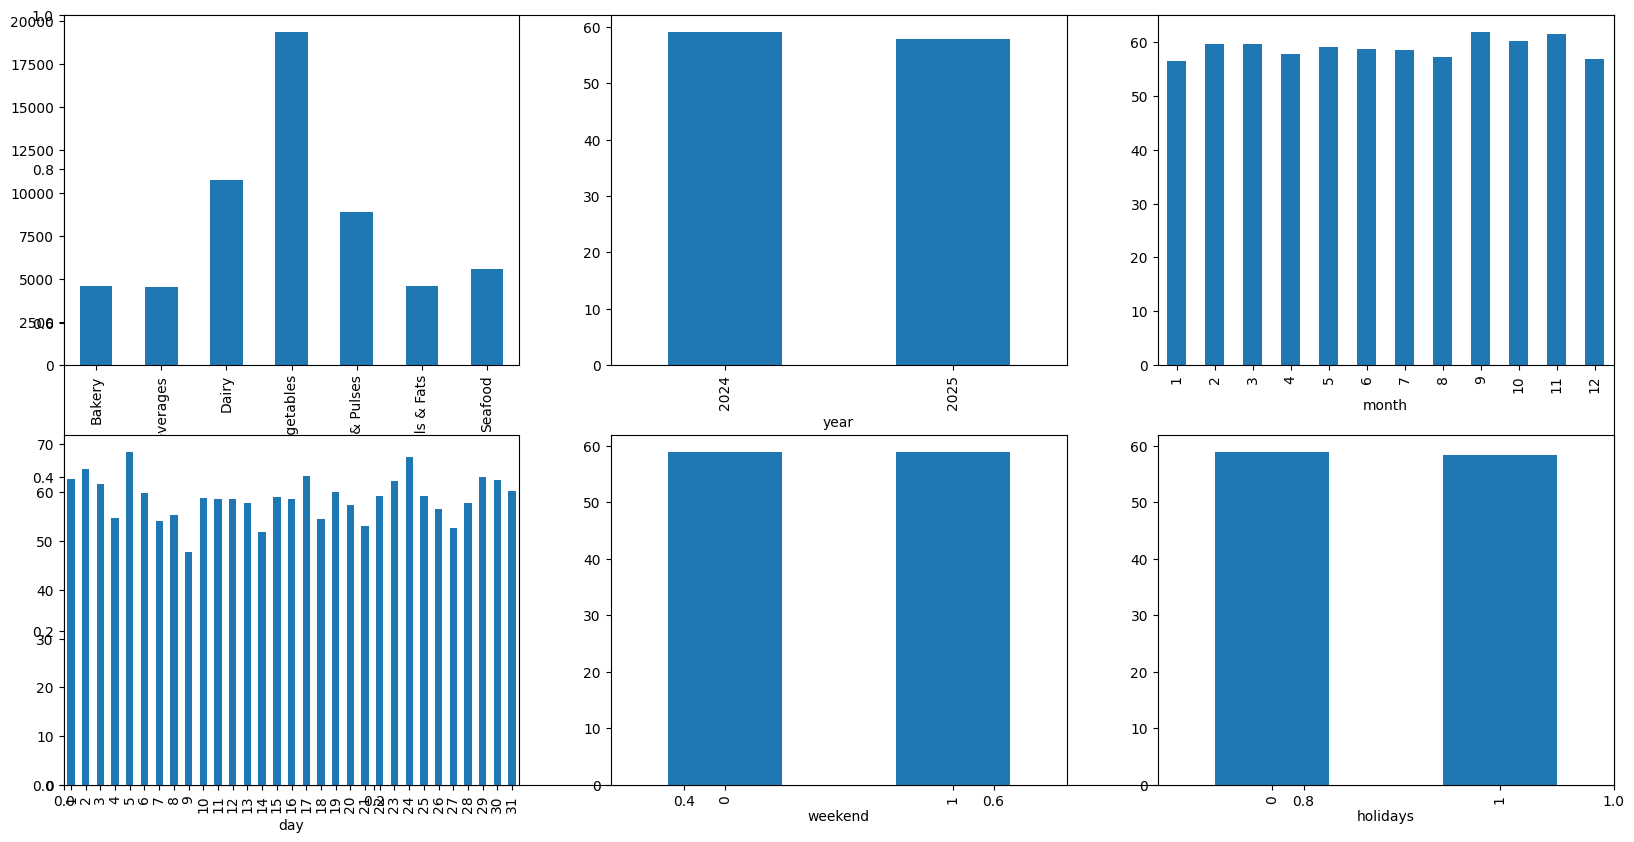

In [14]:
# Analyze relationship between several features and sales performance using visual techniques

features = ['Catagory', 'year', 'month', 'day', 'weekend', 'holidays']

# Group by the column and calculate the sum of 'Sales_Volume' for non-numeric columns.
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    if gro[col].dtype == 'object':
        data = gro.groupby(col)['Sales_Volume'].sum()
    else:
        data = gro.groupby(col)['Sales_Volume'].mean()
    data.plot.bar()  # Plot the bar chart
plt.show()

<Figure size 1000x500 with 0 Axes>

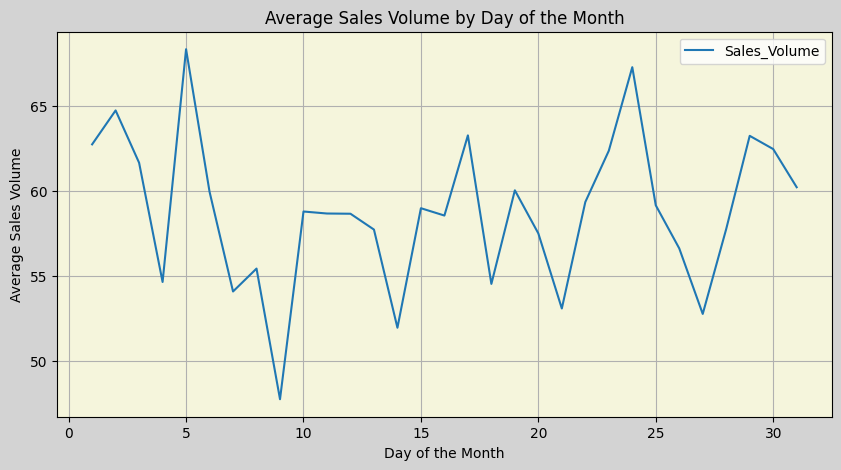

In [15]:
# Visualizing Average Sales Volume by Day of the Month
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5), facecolor='lightgray')
ax = gro.groupby('day')['Sales_Volume'].mean().plot()
ax.set_facecolor('beige')
plt.title('Average Sales Volume by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Sales Volume')
plt.legend()
plt.grid()
plt.show()

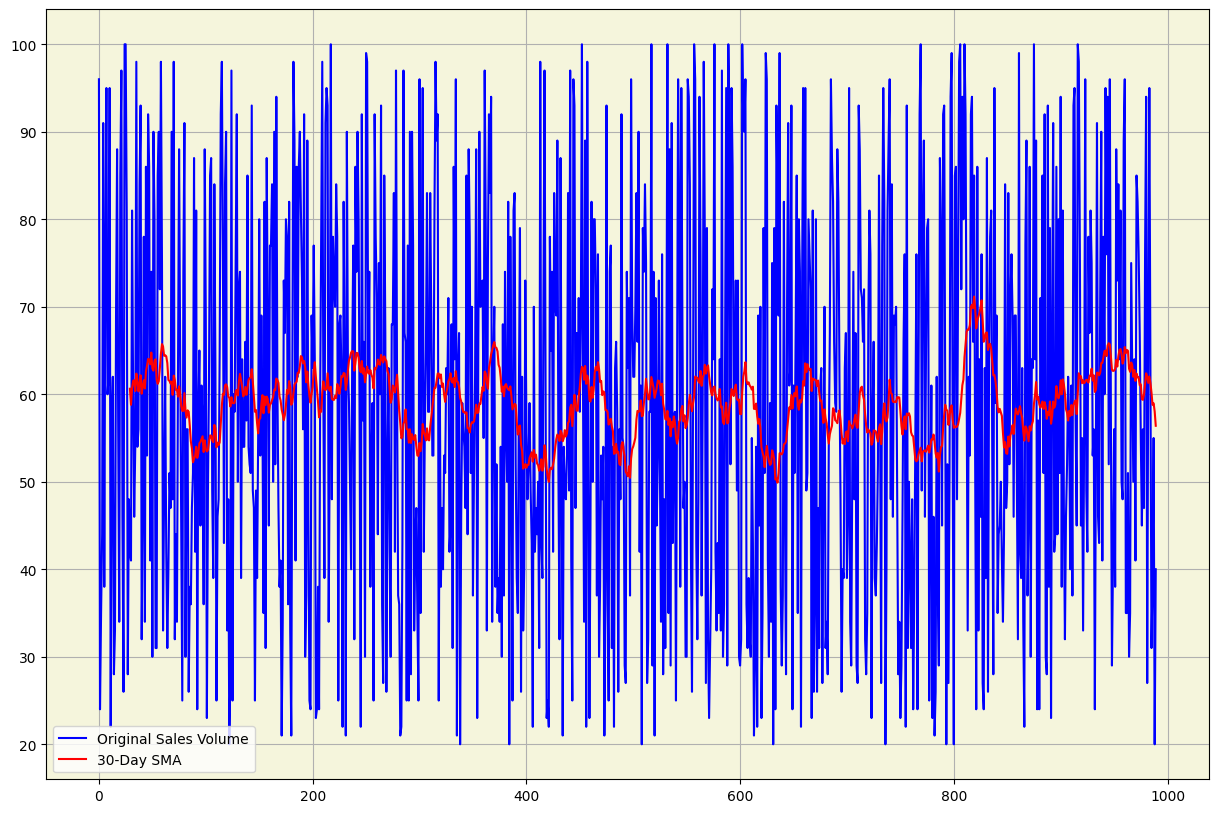

In [16]:
# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = gro[gro['year']==2024]
windows = gro['Sales_Volume'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

# Plotting with grid and colors
plt.figure(figsize=(15, 10))
ax = gro['Sales_Volume'].plot(label='Original Sales Volume', color='blue')
ax.set_facecolor('beige')
sma.plot(label='30-Day SMA', color='red')
plt.legend()
plt.grid(True)
plt.show()

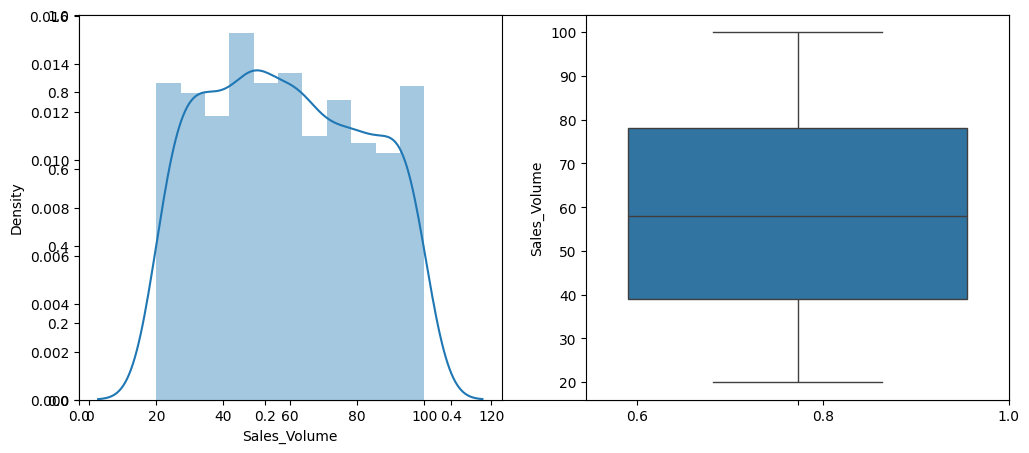

In [17]:
# Display distribution plot and boxplot
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(gro['Sales_Volume'])

plt.subplot(1, 2, 2)
sb.boxplot(gro['Sales_Volume'])
plt.show()

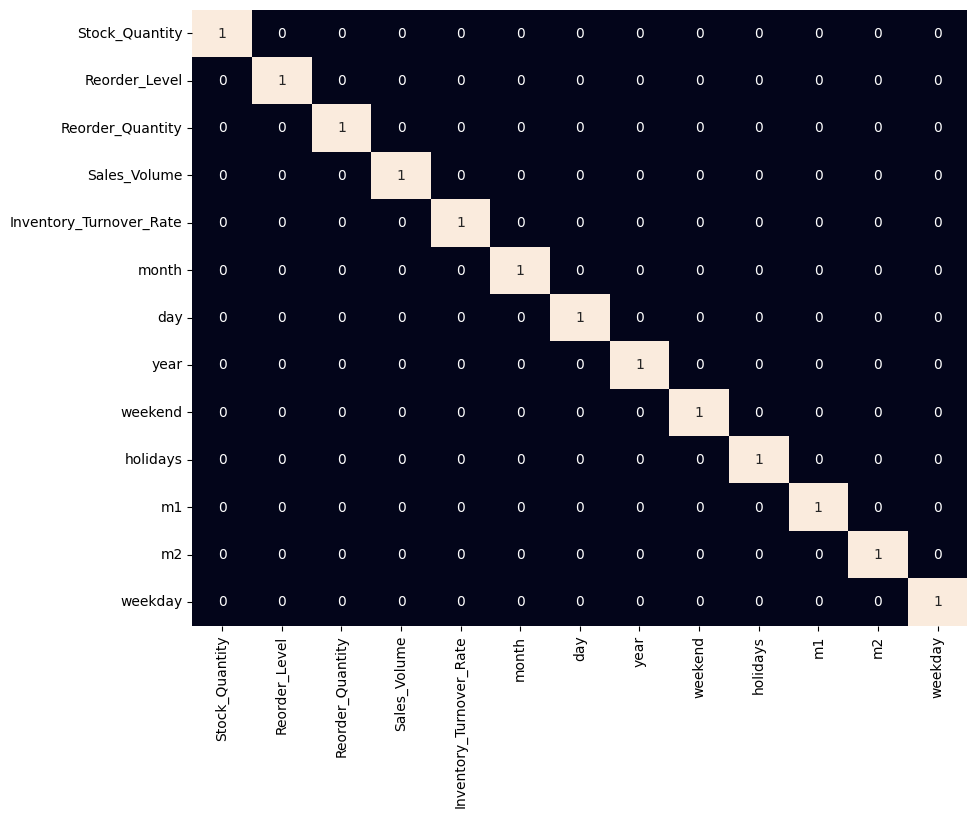

In [18]:
# Correlation among the features
plt.figure(figsize=(10, 8))
numeric_gro = gro.select_dtypes(include=np.number)
sb.heatmap(numeric_gro.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [19]:
# Create feature and target variable
features = gro.drop(['Sales_Volume', 'year'], axis=1)
target = gro['Sales_Volume'].values

# Split the dataset into a training and test dataset
X_train, X_val, Y_train, Y_val = train_test_split(features, target,test_size = 0.05,random_state=22)
X_train.shape, X_val.shape

((939, 22), (50, 22))

In [20]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder on the categorical columns of the training data and transform both training and validation data
categorical_cols = features.select_dtypes(include=['object']).columns  # Select categorical columns
encoded_features_train = encoder.fit_transform(X_train[categorical_cols])
encoded_features_val = encoder.transform(X_val[categorical_cols])

# Create DataFrames from the encoded features
encoded_features_train_df = pd.DataFrame(encoded_features_train, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
encoded_features_val_df = pd.DataFrame(encoded_features_val, columns=encoder.get_feature_names_out(categorical_cols), index=X_val.index)


# Drop original categorical columns and concatenate encoded features
X_train = X_train.drop(categorical_cols, axis=1)
X_val = X_val.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, encoded_features_train_df], axis=1)
X_val = pd.concat([X_val, encoded_features_val_df], axis=1)


# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
# Create and compare the four machine learning models
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  7.908666030667398e-14
Validation Error :  21.121407449646263

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  9.405561447143555
Validation Error :  22.21062660217285

Lasso() : 
Training Error :  16.36220091910734
Validation Error :  20.966